# SVM (Support Vector Machine)

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# loading iris dataset
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X = iris.data[:, 2:]   # petal length (cm) -- petal width (cm)
y = (iris.target == 2).astype(int)    # virginica predictor
m = iris.data.shape[0]

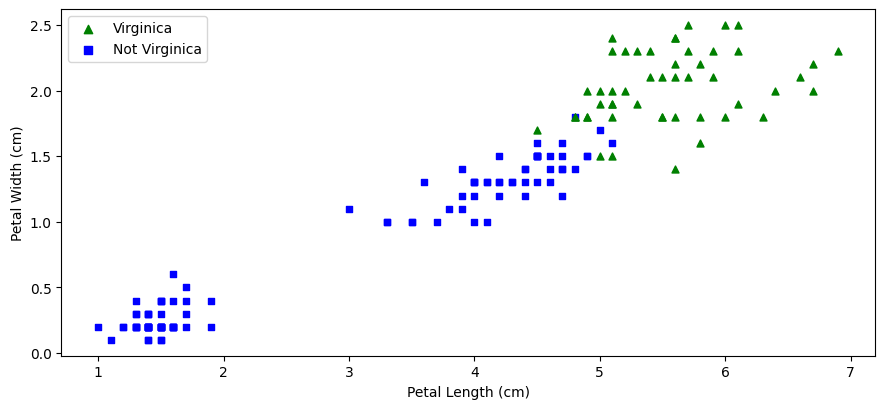

In [5]:
plt.figure(figsize=(10.5, 4.5))
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    a = plt.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.legend([plt.scatter([], [], c='g', marker='^'), plt.scatter([], [], c='b', marker='s')], ['Virginica', 'Not Virginica'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

## Soft Margin Classification
using *scikit-learn*

In [6]:
from sklearn.svm import LinearSVC

In [7]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge', C=10))
])

svm_clf.fit(X, y)

C:\Users\Ausu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

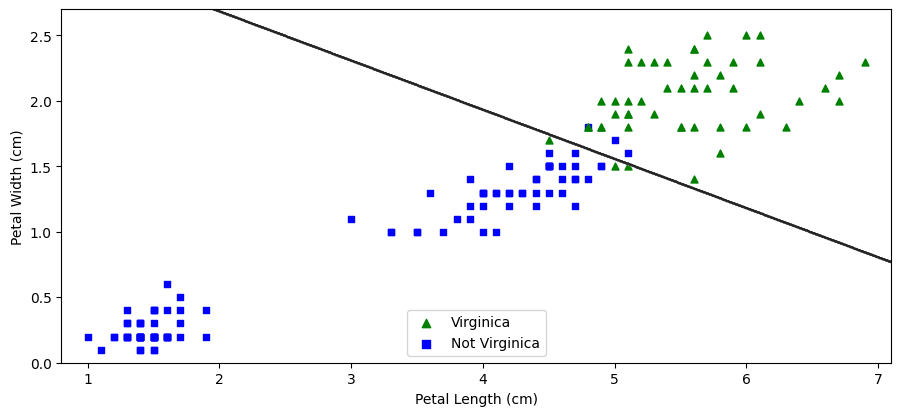

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

fig = plt.figure(figsize=(6.3 * 1.7, 2.7 * 1.7))
ax = plt.axes()
fig = DecisionBoundaryDisplay.from_estimator(svm_clf, X, response_method='predict', plot_method='contour',
                                             ax=ax, grid_resolution=1000, cmap=plt.cm.binary)
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    fig.ax_.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.legend([plt.scatter([], [], c='g', marker='^'), plt.scatter([], [], c='b', marker='s')],
           ['Virginica', 'Not Virginica'], loc='lower center')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.axis([0.8, 7.1, 0, 2.7])
plt.show()

## Nonlinear SVM Classification
using *scikit-learn*
- [ ] adding polynomial features: using PolynomialFeatures
- [x] kernel trick (poly): the previous one, without really adding features
- [ ] adding similarity features (Gaussian RBF): each landmark represents a feature
- [ ] kernel trick (rbf): the previous one, without really adding features

In [9]:
from sklearn.datasets import make_moons

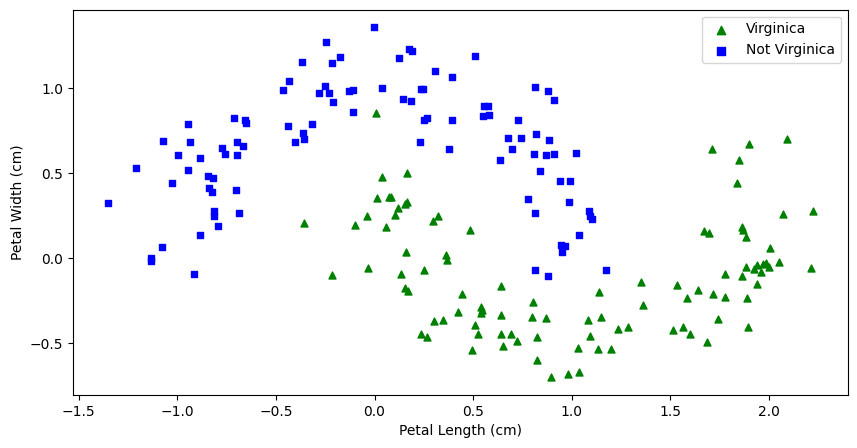

In [10]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.figure(figsize=(10, 5))
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    a = plt.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.legend([plt.scatter([], [], c='g', marker='^'), plt.scatter([], [], c='b', marker='s')], ['Virginica', 'Not Virginica'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [11]:
from sklearn.svm import SVC

In [12]:
poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_kernel_svc', SVC(kernel='poly', degree=3, C=5, coef0=1))
])
poly_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_kernel_svc', SVC(C=5, coef0=1, kernel='poly'))])

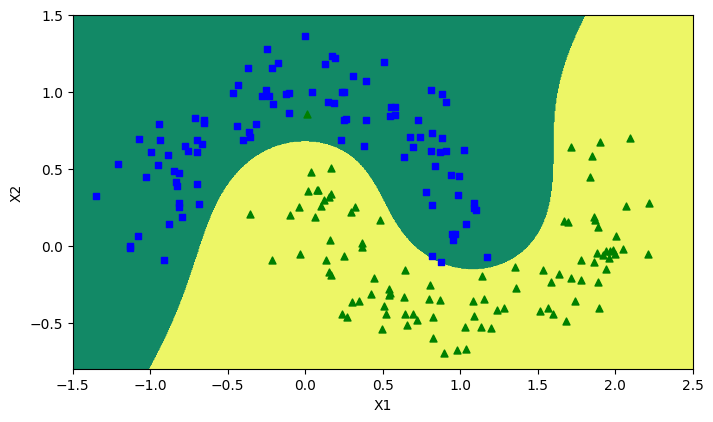

In [13]:
fig = plt.figure(figsize=(8, 4.6))
ax = plt.axes()
fig = DecisionBoundaryDisplay.from_estimator(poly_svm_clf, X, response_method='predict', plot_method='contourf',
                                             ax=ax, grid_resolution=1000, cmap=plt.cm.summer)
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    fig.ax_.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis([-1.5, 2.5, -0.8, 1.5])
plt.show()

## Nonlinear SVM Classification
using *scikit-learn*
- [ ] adding polynomial features: using PolynomialFeatures
- [ ] kernel trick (poly): the previous one, without really adding features
- [ ] adding similarity features (Gaussian RBF): each landmark represents a feature
- [x] kernel trick (rbf): the previous one, without really adding features

In [14]:
rbf_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel_svc', SVC(kernel='rbf', gamma=0.1, C=1000))
])
rbf_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_kernel_svc', SVC(C=1000, gamma=0.1))])

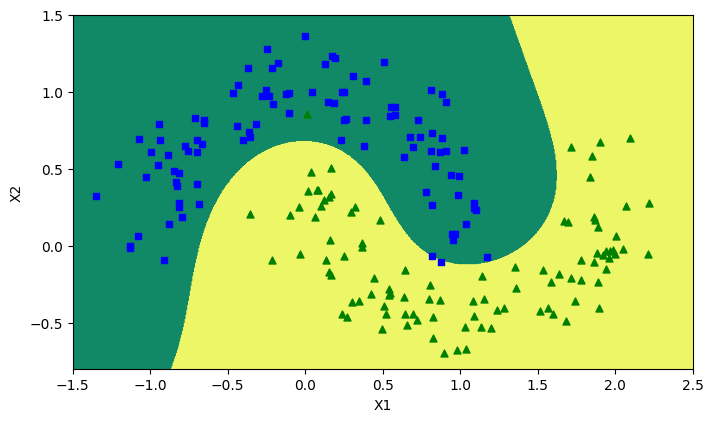

In [15]:
fig = plt.figure(figsize=(8, 4.6))
ax = plt.axes()
fig = DecisionBoundaryDisplay.from_estimator(rbf_svm_clf, X, response_method='predict', plot_method='contourf',
                                             ax=ax, grid_resolution=1000, cmap=plt.cm.summer)
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    fig.ax_.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis([-1.5, 2.5, -0.8, 1.5])
plt.show()

## SVM Regression
using *scikit-learn*

similar to classification, we can use both *poly* and *rbf* kernel tricks

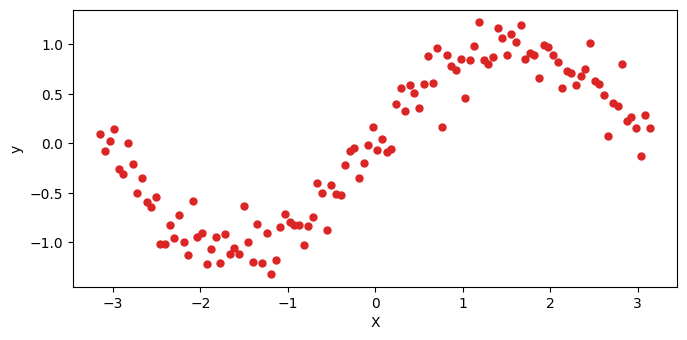

In [16]:
np.random.seed(42)
X = np.linspace(-np.pi, np.pi, 120).reshape(-1, 1)
y = (np.sin(X) + 0.2 * np.random.randn(120, 1)).ravel()

plt.figure(figsize=(6.5 * 1.2, 3 * 1.2))
plt.scatter(X[:, 0], y, c='#db2525', marker='o', s=25)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
from sklearn.svm import LinearSVR, SVR

In [18]:
poly_svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_kernel_svr', SVR(kernel='poly', degree=3, C=1, coef0=1, epsilon=0.1))
])
poly_svm_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_kernel_svr', SVR(C=1, coef0=1, kernel='poly'))])

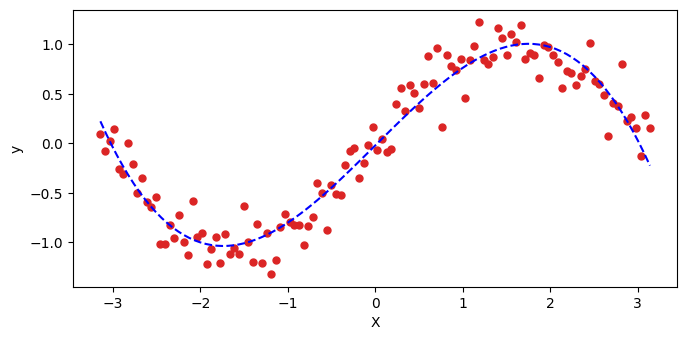

In [19]:
x = np.linspace(-np.pi, np.pi, 100)

fig = plt.figure(figsize=(6.5 * 1.2, 3 * 1.2))
plt.plot(x, poly_svm_reg.predict(x.reshape(-1, 1)), c='b', ls='--')
plt.scatter(X[:, 0], y, c='#db2525', marker='o', s=25)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Linear Soft Margin SVM Classifier

### prediction: $\hat{y} = \begin{cases}
0 & \text{if } XW + b < 0 \\ 1 & \text{if } XW + b \ge 0
\end{cases}$
---
**objective:** we need to minimize $||w||$ to maximize margin (for classification)

---
### error function: $\frac{1}{2}w^{T}w + C \sum\limits_{i=1}^{m} max(0, 1 - t^{(i)}(w^{T}x^{(i)} + b))$
where $t^{(i)} = \begin{cases}
1 & \text{if } y^{(i)} = 1 \\ -1 & \text{if } y^{(i)} = 0
\end{cases}$

In [20]:
# preparing iris dataset
X = iris.data[:, 2:]   # petal length (cm) -- petal width (cm)
y = (iris.target == 2).astype(int)    # virginica predictor
m = iris.data.shape[0]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# random initialization
w = np.random.randn(X.shape[1])
b = np.random.randn(1)
w = np.zeros(X.shape[1])
b = 0

alpha = 1e-4   # learning rate
C = 100   # regularization hyperparamete
n_iters = 1000

t = list(map(lambda y: -1 if y == 0 else 1, y))

# update rule
for _ in range(n_iters):
    for idx, x_i in enumerate(X):
        condition = t[idx] * (w.T.dot(x_i) + b) <= 1
        if condition:
            dw = w - C * np.dot(x_i, t[idx])
            db = - C * t[idx]
        else:
            dw = w
            db = 0
        w -= alpha * dw
        b -= alpha * db
        
y_pred = [0 if x.dot(w) + b < 0 else 1 for x in X]
print('accuracy:', sum(y_pred == y) / len(y) * 100, '%')
print(w, b)

accuracy: 96.0 %
[1.87802866 2.41796646] -2.5899999999999888


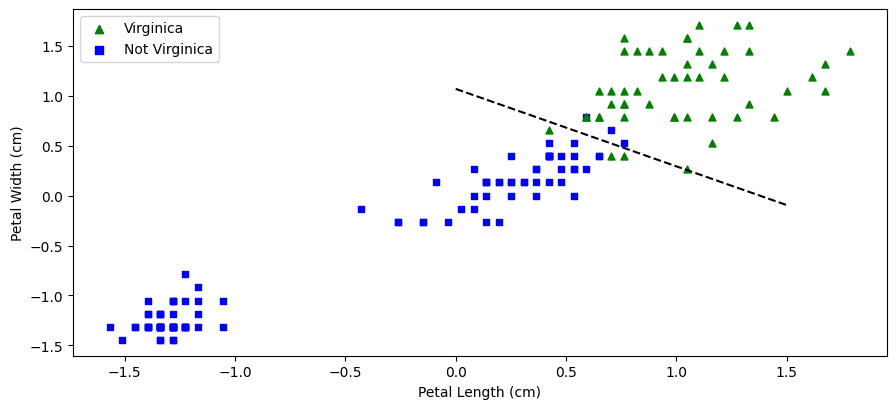

In [23]:
x_plot = np.linspace(0, 1.5, 100)
y_plot = (-1 / w[1]) * (w[0] * x_plot + b)
plt.figure(figsize=(10.5, 4.5))
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1],
                          list(map(lambda y: 'g' if y == 1 else 'b', y)),
                         list(map(lambda y: '^' if y == 1 else 's', y))):
    a = plt.scatter(x_s, y_s, c=c, marker=m, s=25)
plt.plot(x_plot, y_plot, c='k', ls='--')
plt.legend([plt.scatter([], [], c='g', marker='^'), plt.scatter([], [], c='b', marker='s')], ['Virginica', 'Not Virginica'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()